In [ ]:
# kaggle 之give me some credit建模
# https://zhuanlan.zhihu.com/p/50051580
# https://zhuanlan.zhihu.com/p/85528766 

In [5]:
import pandas
data_train=pandas.read_csv('GiveMeSomeCredit-cs-training.csv')
# train=pandas.read_csv('GiveMeSomeCredit-cs-training.csv')
test=pandas.read_csv('GiveMeSomeCredit-cs-test.csv')

In [23]:
#选择子集
# data_train.drop('Unnamed: 0',axis=1,inplace=True)
data_train.head()

,ID,Isdlq,Revol,age,Num30-59late,DebtRatio,MonthlyIncome,Numopen,Num90late,Numestate,Num60-89late,Numdepend
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0


In [24]:
#列名重命名
colnames={'SeriousDlqin2yrs':'Isdlq',
         'RevolvingUtilizationOfUnsecuredLines':'Revol',
         'NumberOfTime30-59DaysPastDueNotWorse':'Num30-59late',
         'NumberOfOpenCreditLinesAndLoans':'Numopen',
         'NumberOfTimes90DaysLate':'Num90late',
         'NumberRealEstateLoansOrLines':'Numestate',
         'NumberOfTime60-89DaysPastDueNotWorse':'Num60-89late',
         'NumberOfDependents':'Numdepend'}
data_train.rename(columns=colnames,inplace=True)
data_train.head()

,ID,Isdlq,Revol,age,Num30-59late,DebtRatio,MonthlyIncome,Numopen,Num90late,Numestate,Num60-89late,Numdepend
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0


In [17]:
# # 2.2 EDA分析
# import seaborn as sns
# MonthNullDependNot=data_train.loc[(data_train['Numdepend'].notnull())&(data_train['MonthlyIncome']).isnull(),:]
# sns.countplot(MonthNullDependNot['Numdepend'])

In [18]:
# 3.数据清洗
# 3.1数据预处理
# 3.1.1异常值处理
#age异常值处理
data_train=data_train[data_train['age']>0]

#Num30-59late Num60-89late Num90late异常值处理
data_train=data_train[data_train['Num30-59late']<90]
data_train=data_train[data_train['Num60-89late']<90]
data_train=data_train[data_train['Num90late']<90]

#Numestate异常值处理
data_train=data_train[data_train['Numestate']<50]

In [20]:
# 3.1.2 缺失值处理
#Numdepend缺失值处理
data_train['Numdepend']=data_train['Numdepend'].fillna('0')

In [27]:
# m_income缺失值处理

# m_income这一变量，缺失值较多且对目标变量影响较大，不能暴力删除，故采用插值法填充缺失值。由于月收入这一变量呈正态分布，因此用中位数去填充他的缺失值。



In [26]:
#MonthlyIncome缺失值处理
MonthlyIncome_median=data_train['MonthlyIncome'].median()
data_train['MonthlyIncome'].fillna(MonthlyIncome_median,inplace=True)

#随机森林预测缺失值

# data_Forest=data_train.iloc[:,[5,1,2,3,4,6,7,8,9]]
# MonthlyIncome_isnull=data_Forest.loc[data_train['MonthlyIncome'].isnull(),:]
# MonthlyIncome_notnull=data_Forest.loc[data_train['MonthlyIncome'].notnull(),:]

# from sklearn.ensemble import RandomForestRegressor
# X=MonthlyIncome_notnull.iloc[:,1:].values
# y=MonthlyIncome_notnull.iloc[:,0].values
# regr=RandomForestRegressor(max_depth=3, random_state=0,n_estimators=200,n_jobs=-1)
# regr.fit(X,y)
# MonthlyIncome_fillvalue=regr.predict(MonthlyIncome_isnull.iloc[:,1:].values).round(0)

#填充MonthlyIncome缺失值
# data_train.loc[data_train['MonthlyIncome'].isnull(),'MonthlyIncome']=MonthlyIncome_fillvalue

In [28]:
# dependents缺失值处理

# dependents缺失值较少，删除后对目标变量影响不大，因此采用删除缺失值的办法。缺失值处理后，用drop_duplicates()删除重复项。
data_train=data_train.dropna()
data_train.info()
data_train=data_train.drop_duplicates()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149729 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             149729 non-null  int64  
 1   Isdlq          149729 non-null  int64  
 2   Revol          149729 non-null  float64
 3   age            149729 non-null  int64  
 4   Num30-59late   149729 non-null  int64  
 5   DebtRatio      149729 non-null  float64
 6   MonthlyIncome  149729 non-null  float64
 7   Numopen        149729 non-null  int64  
 8   Num90late      149729 non-null  int64  
 9   Numestate      149729 non-null  int64  
 10  Num60-89late   149729 non-null  int64  
 11  Numdepend      149729 non-null  object 
dtypes: float64(3), int64(8), object(1)
memory usage: 14.9+ MB


In [ ]:
# 4、异常值处理
# 略

In [29]:
# 3.2.特征工程
# 3.2.1 特征提取
#衍生变量
data_train['AllNumlate']=data_train['Num30-59late']+data_train['Num60-89late']+data_train['Num90late']
data_train['Monthlypayment']=data_train['DebtRatio']*data_train['MonthlyIncome']
data_train['Withdepend']=data_train['Numdepend']

In [30]:
data_train

,ID,Isdlq,Revol,age,Num30-59late,DebtRatio,MonthlyIncome,Numopen,Num90late,Numestate,Num60-89late,Numdepend,AllNumlate,Monthlypayment,Withdepend
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2,2,7.323197e+03,2
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1,0,3.168781e+02,1
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0,2,2.589149e+02,0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0,0,1.189640e+02,0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0,1,1.584975e+03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0,0,4.727749e+02,0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2,0,4.001283e+03,2
149997,149998,0,0.246044,58,0,3870.000000,5400.0,18,0,1,0,0,0,2.089800e+07,0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0,0,0.000000e+00,0


In [31]:
# 3.2.2 特征分箱 
# https://zhuanlan.zhihu.com/p/50051580
#数据类型转换
data_train['Numdepend']=data_train['Numdepend'].astype('int64')
data_train['Withdepend']=data_train['Withdepend'].astype('int64')
data_train['MonthlyIncome']=data_train['MonthlyIncome'].astype('int64')
data_train['Monthlypayment']=data_train['Monthlypayment'].astype('int64')

In [32]:
#Revol分箱
data_train.loc[(data_train['Revol']<1),'Revol']=0
data_train.loc[(data_train['Revol']>1)&(data_train['Revol']<=20),'Revol']=1
data_train.loc[(data_train['Revol']>20),'Revol']=0#根据前文EDA分析，将大于20的数据与0-1的数据合并

#DebtRatio分箱
data_train.loc[(data_train['DebtRatio']<1),'DebtRatio']=0
data_train.loc[(data_train['DebtRatio']>1)&(data_train['DebtRatio']<2),'DebtRatio']=1
data_train.loc[(data_train['DebtRatio']>=2),'DebtRatio']=0

#Num30-59late/Num60-89late/Num90late/Numestate/Numdepend
data_train.loc[(data_train['Num30-59late']>=8), 'Num30-59late'] = 8
data_train.loc[(data_train['Num60-89late']>=7), 'Num60-89late'] = 7
data_train.loc[(data_train['Num90late']>=10), 'Num90late'] = 10
data_train.loc[(data_train['Numestate']>=8), 'Numestate'] = 8
data_train.loc[(data_train['Numdepend']>=7), 'Numdepend'] = 7

#AllNumlate分箱
data_train.loc[(data_train['AllNumlate']>1),'AllNumlate']=1#分为逾期和未逾期两种情况

#Withdepend分箱
data_train.loc[(data_train['Withdepend']>1),'Withdepend']=1#分为独生子女和非独生子女

<AxesSubplot:>

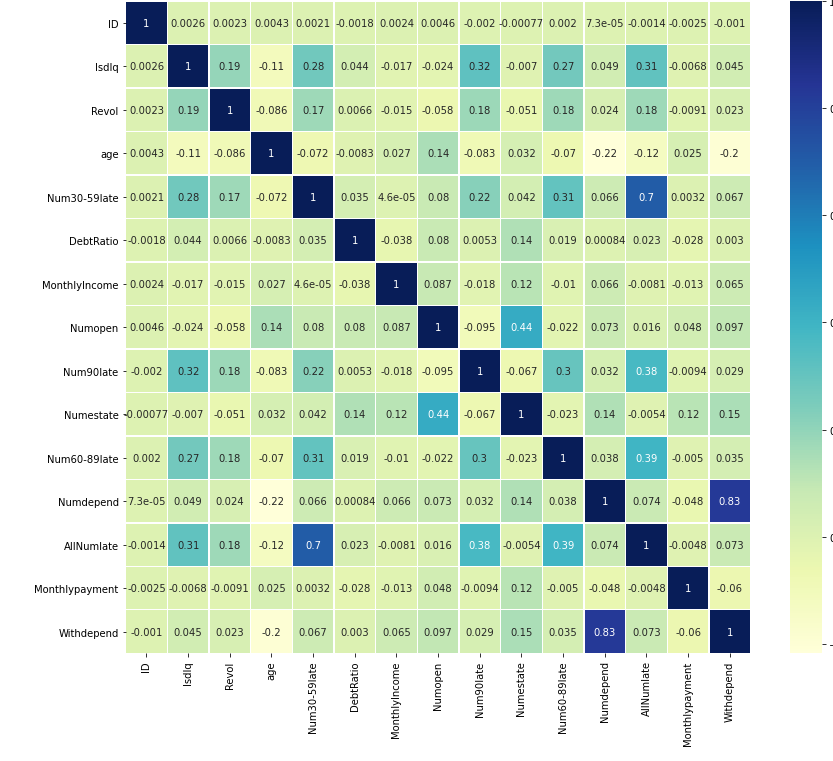

In [33]:
# 3.2.3 特征选择
# 1）根据相关系数查看各变量相关性
import matplotlib.pyplot as plt
corr=data_train.corr()
plt.figure(figsize=(14,12))
sns.heatmap(corr,annot=True,linewidths=.3,cmap='YlGnBu')

In [34]:
# # 2）WOE，IV值计算
# WOE

# WOE，“Weight of Evidence”，即证据权重，是对原始自变量的一种编码形式。

# 要对一个变量进行WOE编码，需要首先把这个变量进行分组处理（也叫离散化、分箱等等）。
def bin_woe(tar, var, n=None, cat=None):
    """
    连续自变量分箱,woe,iv变换
    tar:target目标变量
    var:进行woe,iv转换的自变量
    n:分组数量
    """
    total_bad = tar.sum()
    total_good =tar.count()-total_bad
    totalRate = total_good/total_bad
    
    if cat == 's':
        msheet = pd.DataFrame({tar.name:tar,var.name:var,'var_bins':pd.qcut(var, n, duplicates='drop')})
        grouped = msheet.groupby(['var_bins'])
    elif (cat == 'd') and (n is None):
        msheet = pd.DataFrame({tar.name:tar,var.name:var})
        grouped = msheet.groupby([var.name])
        
    groupBad = grouped.sum()[tar.name]
    groupTotal = grouped.count()[tar.name]
    groupGood = groupTotal - groupBad
    groupRate = groupGood/groupBad
    groupBadRate = groupBad/groupTotal
    groupGoodRate = groupGood/groupTotal

    woe = np.log(groupRate/totalRate)
    iv = np.sum((groupGood/total_good-groupBad/total_bad)*woe)
    
    if cat == 's':
        new_var, cut = pd.qcut(var, n, duplicates='drop',retbins=True, labels=woe.tolist())
    elif cat == 'd':
        dictmap = {}
        for x in woe.index:
            dictmap[x] = woe[x]
        new_var, cut = var.map(dictmap), woe.index
    
    return woe.tolist(), iv, cut, new_var

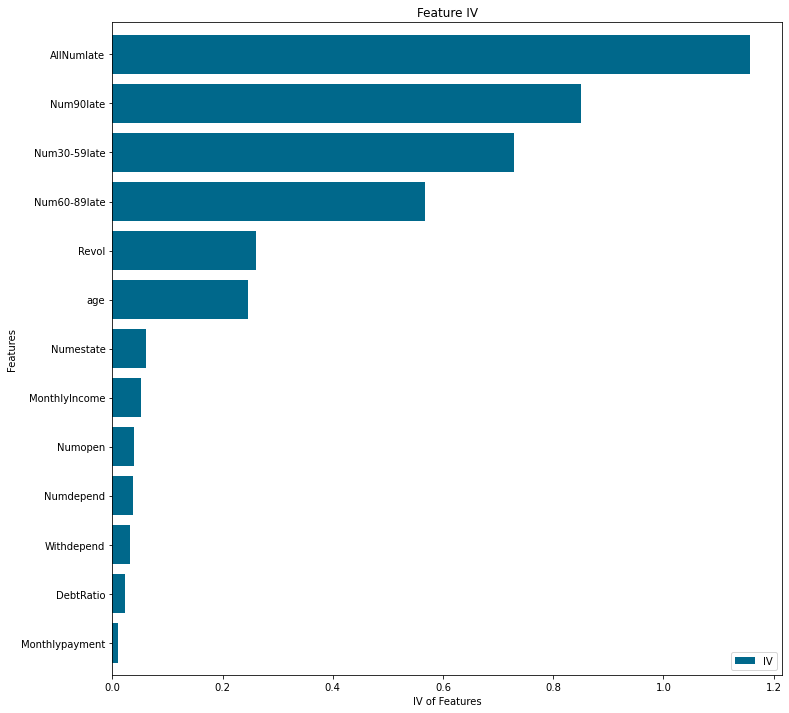

In [37]:
# IV

# IV的全称是Information Value，中文意思是信息价值，或者信息量。意思是变量对预测的贡献度大小。
# 确定变量类型，连续变量还是离散变量
import pandas as pd
import numpy as np
dvar = ['Revol','DebtRatio','Num30-59late', 'Num60-89late','Num90late','AllNumlate','Withdepend',
        'Numestate','Numdepend']
svar = ['MonthlyIncome','age','Monthlypayment','Numopen']

# 可视化woe得分和iv得分
def woe_vs(data):
    cutdict = {}
    ivdict = {}
    woe_dict = {}
    woe_var = pd.DataFrame()
    for var in data.columns:
        if var in dvar:
            woe, iv, cut, new = bin_woe(data['Isdlq'], data[var], cat='d')
            woe_dict[var] = woe
            woe_var[var] = new
            ivdict[var] = iv
            cutdict[var] = cut
        elif var in svar:
            woe, iv, cut, new = bin_woe(data['Isdlq'], data[var], n=5, cat='s')
            woe_dict[var] = woe
            woe_var[var] = new
            ivdict[var] = iv
            cutdict[var] = cut
            
    ivdict = sorted(ivdict.items(), key=lambda x:x[1], reverse=False)
    iv_vs = pd.DataFrame([x[1] for x in ivdict],index=[x[0] for x in ivdict],columns=['IV'])
    ax = iv_vs.plot(kind='barh',
                    figsize=(12,12),
                    title='Feature IV',
                    fontsize=10,
                    width=0.8,
                    color='#00688B')
    ax.set_ylabel('Features')
    ax.set_xlabel('IV of Features')
    
    return ivdict, woe_var, woe_dict, cutdict

# woe转化
ivinfo, woe_data, woe_dict, cut_dict = woe_vs(data_train)

In [38]:
# 5.构建模型
#分离训练集和测试集
from sklearn.model_selection import train_test_split
IV_info=['Num60-89late','Num90late','AllNumlate','Revol','age']
X=woe_data[IV_info]
y=data_train['Isdlq']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

#Logistic模型建立
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=0,
                           solver="sag",
                           penalty="l2",
                           class_weight="balanced",
                           C=1.0,
                           max_iter=500)
model.fit(X_train, y_train)
model_proba = model.predict_proba(X_test)#predict_proba返回的结果是一个数组，包含两个元素，第一个元素是标签为0的概率值，第二个元素是标签为1的概率值
model_score=model_proba[:,1]

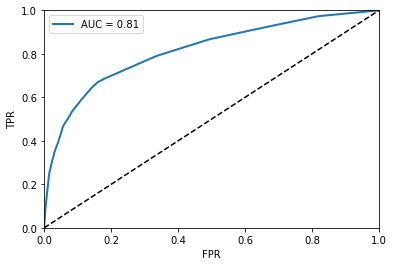

In [39]:
# 6. 模型评估
# 用ROC曲线和AUC来评估模型的预测能
#绘制ROC曲线，计算AUC值
from sklearn.metrics import roc_curve, roc_auc_score
fpr,tpr,thresholds =roc_curve(y_test,model_score)
auc_score=roc_auc_score(y_test,model_score)
plt.plot(fpr, tpr, linewidth=2, label='AUC = %0.2f'%auc_score)
plt.plot([0,1],[0,1], "k--")
plt.axis([0,1,0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

In [ ]:
# 通过ROC曲线和AUC值看到，AUC的值为0.81，说明模型的区分能力还可以。

In [40]:
# 7. 制作评分卡
intercept=model.intercept_
coef=model.coef_
coe=coef[0].tolist()
coe_df=pd.DataFrame({'feature':IV_info,'coe':coe})

import math
B=20/math.log(2)
A=600+B*math.log(1/20)
#基础分
score=round(A-B*intercept[0],0)

In [41]:
featurelist = []
woelist = []
cutlist = []
for k,v in woe_dict.items():
    if k in IV_info:
        for n in range(0,len(v)):
            featurelist.append(k)
            woelist.append(v[n])
            cutlist.append(cut_dict[k][n])
scoreboard = pd.DataFrame({'feature':featurelist,'woe':woelist,'cut':cutlist},
                          columns=['feature','cut','woe'])
score_df=pd.merge(scoreboard,coe_df)
score_df['score']=round(-B*score_df['woe']*score_df['coe'],0)
score_df.drop('coe',axis=1,inplace=True)
score_df


,feature,cut,woe,score
0,Revol,0.0,0.119231,2.0
1,Revol,1.0,-2.226404,-39.0
2,age,21.0,-0.487176,-11.0
3,age,39.0,-0.252550,-6.0
4,age,48.0,-0.078322,-2.0
5,age,56.0,0.430131,10.0
6,age,65.0,1.054175,24.0
7,Num90late,0.0,0.375825,5.0
8,Num90late,1.0,-1.971852,-28.0
9,Num90late,2.0,-2.646301,-37.0
